In [44]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


In [45]:
# Replace 'path_to_your_file' with the actual path to your Excel file
file_path = '/content/BSA-dataset-synthetic.xlsx'

# Load the Excel file into a pandas DataFrame
df = pd.read_excel(file_path)

In [46]:
# Initialize the YEAR column with zeros
df['YEAR'] = 0

# Loop through each column specified in the varlist
for var in ['Course23', 'Course26', 'Course3', 'Course16', 'Course8', 'Course9', 'Course22', 'Course7', 'Course25', 'Course24']:
    df['YEAR'] += df[var].apply(lambda x: 6 if x >= 5.5 and not pd.isnull(x) else 0)

# Generate the passed42 column and convert boolean to integer
df['passed42'] = (df['YEAR'] >= 42).astype(int)

In [47]:
columns_to_drop = ['train', 'Course23', 'Course26', 'Course16', 'Course8', 'Course22', 'Course7', 'Course25', 'Course24', 'Credits-Y1', 'BSA','Program', 'YEAR']


# Drop the specified columns
df.drop(columns=columns_to_drop, inplace=True)

In [48]:
# Assuming df contains your DataFrame with categorical variables
df = pd.get_dummies(df, columns=['Gender', 'Nationality', 'PreEducation','Year'], dtype=int)


non_categorical_columns = [col for col in df.columns if col not in ['Gender', 'Nationality', 'PreEducation', 'Program', 'Year', 'BSA']]
df[non_categorical_columns] = df[non_categorical_columns].fillna(0)


In [49]:
# Replace 'target_column' with the name of your target column
X = df.drop(columns=['passed42'])
y = df['passed42']


In [50]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [54]:
# Create a baseline Random Forest Classifier
baseline_rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the baseline model
baseline_rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_baseline = baseline_rf_classifier.predict(X_test)

# Evaluate the baseline model
accuracy_baseline = accuracy_score(y_test, y_pred_baseline)
precision_baseline = precision_score(y_test, y_pred_baseline, average='binary')
recall_baseline = recall_score(y_test, y_pred_baseline, average='binary')
f1_baseline = f1_score(y_test, y_pred_baseline, average='binary')

# Print the baseline metrics
print('Baseline Model Performance:')
print(f'Accuracy: {accuracy_baseline}')
print(f'Precision: {precision_baseline}')
print(f'Recall: {recall_baseline}')
print(f'F1 Score: {f1_baseline}')
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_baseline))
print('Classification Report:')
print(classification_report(y_test, y_pred_baseline))

Baseline Model Performance:
Accuracy: 0.7692307692307693
Precision: 1.0
Recall: 0.7
F1 Score: 0.8235294117647058
Confusion Matrix:
[[3 0]
 [3 7]]
Classification Report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         3
           1       1.00      0.70      0.82        10

    accuracy                           0.77        13
   macro avg       0.75      0.85      0.75        13
weighted avg       0.88      0.77      0.79        13



In [55]:
# Define the parameter grid for Grid Search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters found by Grid Search
print(f'Best parameters found: {grid_search.best_params_}')


Fitting 3 folds for each of 324 candidates, totalling 972 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best parameters found: {'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}


In [57]:
# Create the model with the best parameters found by Grid Search
best_rf_classifier = RandomForestClassifier(
    max_depth=grid_search.best_params_['max_depth'],
    max_features=grid_search.best_params_['max_features'],
    min_samples_leaf=grid_search.best_params_['min_samples_leaf'],
    min_samples_split=grid_search.best_params_['min_samples_split'],
    n_estimators=grid_search.best_params_['n_estimators'],
    random_state=42
)

# Train the model with the best parameters
best_rf_classifier.fit(X_train, y_train)

# Make predictions on the test set with the best model
y_pred_best = best_rf_classifier.predict(X_test)

# Evaluate the model with the best parameters
accuracy_best = accuracy_score(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best, average='binary')
recall_best = recall_score(y_test, y_pred_best, average='binary')
f1_best = f1_score(y_test, y_pred_best, average='binary')

# Print the metrics for the best model
print('Best Model Performance:')
print(f'Accuracy: {accuracy_best}')
print(f'Precision: {precision_best}')
print(f'Recall: {recall_best}')
print(f'F1 Score: {f1_best}')
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_best))
print('Classification Report:')
print(classification_report(y_test, y_pred_best))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best Model Performance:
Accuracy: 0.7692307692307693
Precision: 1.0
Recall: 0.7
F1 Score: 0.8235294117647058
Confusion Matrix:
[[3 0]
 [3 7]]
Classification Report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         3
           1       1.00      0.70      0.82        10

    accuracy                           0.77        13
   macro avg       0.75      0.85      0.75        13
weighted avg       0.88      0.77      0.79        13



In [58]:
# Print the predictions made by the best model
print("Best Model Predictions:")
print(y_pred_best)


Best Model Predictions:
[0 0 1 1 1 1 0 0 1 1 0 1 0]


In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Get the feature importances of the best model
feature_importances_best = best_rf_classifier.feature_importances_

# Assuming you have a list of feature names
feature_names = X.columns

# Create a DataFrame for better visualization
importance_df_best = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances_best
})

# Sort the DataFrame by importance
importance_df_best = importance_df_best.sort_values(by='Importance', ascending=False)

# Display the DataFrame
print('Feature Importances of the Best Model:')
print(importance_df_best)


Feature Importances of the Best Model:
                         Feature  Importance
6                   Credits-B1B2    0.249587
3                      Course7-1    0.178551
2                      Course8-1    0.178548
0                      Course3-1    0.084318
1                      Course9-1    0.076705
8                        Course9    0.074224
7                        Course3    0.041142
4                      Course3-R    0.018847
13                Nationality_EU    0.012885
10                      Gender_M    0.011309
9                       Gender_F    0.011129
24                    Year_21/22    0.011062
25                    Year_22/23    0.010282
5                      Course9-R    0.009884
20      PreEducation_Buitenlands    0.008196
23              PreEducation_Vwo    0.007771
16         Nationality_Nederland    0.005899
12              Nationality_Azie    0.003439
17     Nationality_Noord-Amerika    0.003082
11            Nationality_Afrika    0.001185
15  Nationality_

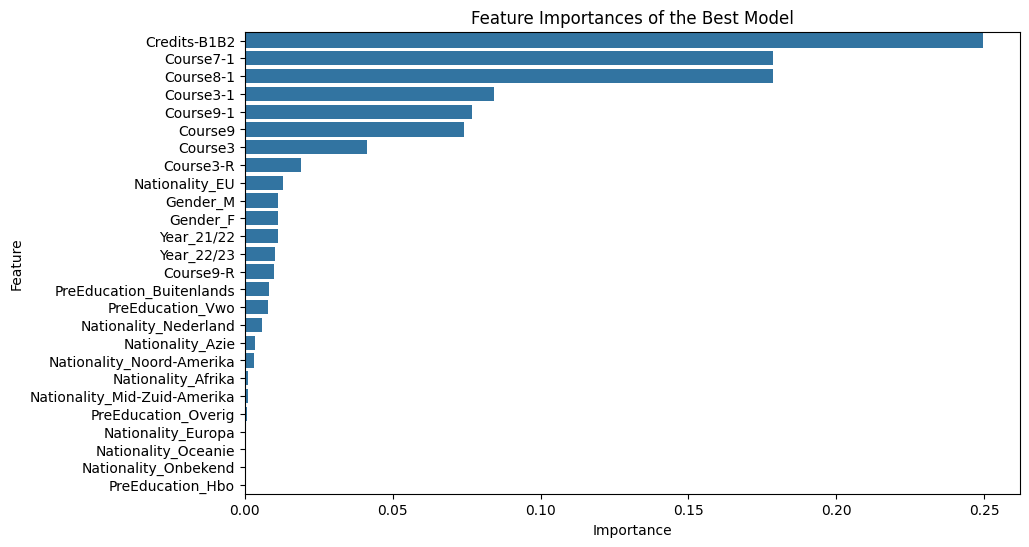

In [61]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df_best)
plt.title('Feature Importances of the Best Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

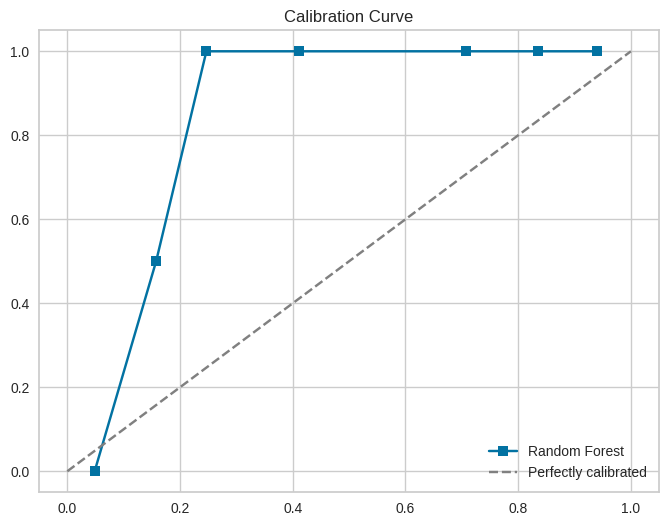

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import precision_recall_curve, roc_curve
from sklearn.calibration import calibration_curve
from sklearn.model_selection import learning_curve
from yellowbrick.model_selection import FeatureImportances
import numpy as np


# Plot Calibration Curve
plt.figure(figsize=(8, 6))
prob_pos = best_rf_classifier.predict_proba(X_test)[:, 1]
fraction_of_positives, mean_predicted_value = calibration_curve(y_test, prob_pos, n_bins=10)
plt.plot(mean_predicted_value, fraction_of_positives, 's-', label='Random Forest')
plt.plot([0, 1], [0, 1], '--', color='gray', label='Perfectly calibrated')
plt.title('Calibration Curve')
plt.legend()
plt.show()



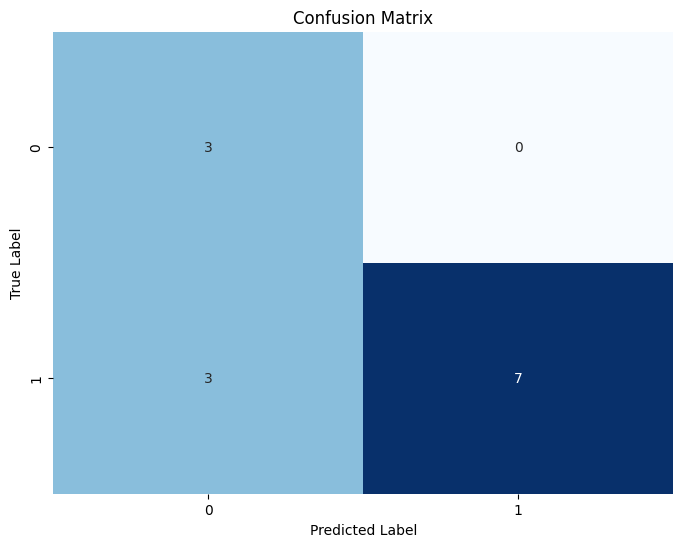

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_best)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [76]:
# Replace 'path_to_your_file' with the actual path to your Excel file
file_path = '/content/BSA-dataset-synthetic.xlsx'

# Load the Excel file into a pandas DataFrame
df = pd.read_excel(file_path)

In [77]:
# Initialize the YEAR column with zeros
df['YEAR'] = 0

# Loop through each column specified in the varlist
for var in ['Course23', 'Course26', 'Course3', 'Course16', 'Course8', 'Course9', 'Course22', 'Course7', 'Course25', 'Course24']:
    df['YEAR'] += df[var].apply(lambda x: 6 if x >= 5.5 and not pd.isnull(x) else 0)

# Generate the passed42 column and convert boolean to integer
df['passed42'] = (df['YEAR'] >= 42).astype(int)

In [78]:
columns_to_drop = ['train', 'Course23', 'Course26', 'Course16', 'Course8', 'Course22', 'Course7', 'Course25', 'Course24', 'Credits-Y1', 'BSA','Program', 'YEAR']


# Drop the specified columns
df.drop(columns=columns_to_drop, inplace=True)

In [79]:
# Assuming df contains your DataFrame with categorical variables
df = pd.get_dummies(df, columns=['Gender', 'Nationality', 'PreEducation','Year'], dtype=int)


non_categorical_columns = [col for col in df.columns if col not in ['Gender', 'Nationality', 'PreEducation', 'Program', 'Year', 'BSA']]
df[non_categorical_columns] = df[non_categorical_columns].fillna(0)


In [94]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split



# Replace 'passed42' with the name of your target column
X = df[['Credits-B1B2']]
y = df['passed42']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Logistic Regression model
logistic_regression = LogisticRegression(random_state=42)

# Train the model
logistic_regression.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lr = logistic_regression.predict(X_test)

# Calculate classification metrics
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)

# Print the metrics
print('Logistic Regression Model Performance:')
print(f'Accuracy: {accuracy_lr}')
print(f'Precision: {precision_lr}')
print(f'Recall: {recall_lr}')
print(f'F1 Score: {f1_lr}')

# Print the confusion matrix and classification report
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_lr))
print('Classification Report:')
print(classification_report(y_test, y_pred_lr))


Logistic Regression Model Performance:
Accuracy: 0.7894736842105263
Precision: 1.0
Recall: 0.6923076923076923
F1 Score: 0.8181818181818181
Confusion Matrix:
[[6 0]
 [4 9]]
Classification Report:
              precision    recall  f1-score   support

           0       0.60      1.00      0.75         6
           1       1.00      0.69      0.82        13

    accuracy                           0.79        19
   macro avg       0.80      0.85      0.78        19
weighted avg       0.87      0.79      0.80        19



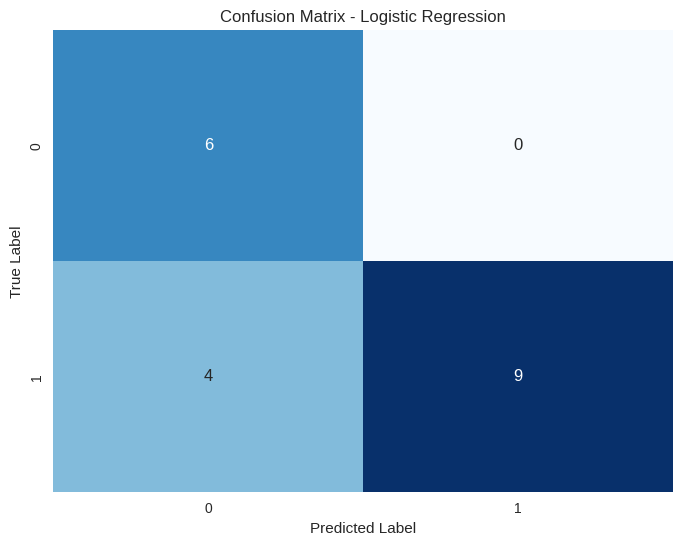

In [97]:
# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

In [99]:
import statsmodels.api as sm

# Fit logistic regression model using statsmodels
logit_model = sm.Logit(y_train, sm.add_constant(X_train))
result = logit_model.fit()

# Display the summary of the logistic regression model
print(result.summary())


Optimization terminated successfully.
         Current function value: 0.386459
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               passed42   No. Observations:                   42
Model:                          Logit   Df Residuals:                       40
Method:                           MLE   Df Model:                            1
Date:                Thu, 23 May 2024   Pseudo R-squ.:                  0.4388
Time:                        10:46:51   Log-Likelihood:                -16.231
converged:                       True   LL-Null:                       -28.921
Covariance Type:            nonrobust   LLR p-value:                 4.707e-07
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -3.6851      1.175     -3.136      0.002      -5.988      -1.382
Credits-B1B2     0.2559

In [100]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each independent variable
vif_data = X_train.copy()
vif_data['Intercept'] = 1  # Add a constant column for the intercept

vif = pd.DataFrame()
vif["Variable"] = vif_data.columns
vif["VIF"] = [variance_inflation_factor(vif_data.values, i) for i in range(vif_data.shape[1])]

# Display the VIF values
print(vif)


       Variable      VIF
0  Credits-B1B2  1.00000
1     Intercept  4.08349


In [101]:
# Compute the correlation matrix
correlation_matrix = X_train.corr()

# Display the correlation matrix
print(correlation_matrix)



              Credits-B1B2
Credits-B1B2           1.0


Data Prep

In [158]:
# Replace 'path_to_your_file' with the actual path to your Excel file
file_path = '/content/BSA-dataset-synthetic.xlsx'

# Load the Excel file into a pandas DataFrame
df = pd.read_excel(file_path)

In [159]:
columns_to_drop = ['train', 'Course23', 'Course26', 'Course16', 'Course8', 'Course22', 'Course7', 'Course25', 'Course24', 'Credits-Y1', 'BSA','Program']


# Drop the specified columns
df.drop(columns=columns_to_drop, inplace=True)

In [211]:
import pandas as pd

# Assuming you have a DataFrame named 'df' containing your data

# Create 'Dutch' column with True/False values based on the condition
df['Dutch'] = (df['Nationality'] == 'Nederland')

# Optionally, you can convert True/False to 1/0
df['Dutch'] = df['Dutch'].astype(int)


In [160]:
import pandas as pd

# Create passedC3 column and initialize with zeros
df['passedC3'] = 0

# Set passedC3 to 1 if Course3-R is greater than or equal to 5.5
df.loc[df['Course3-R'] >= 5.5, 'passedC3'] = 1

# Set passedC3 to 1 if Course3-R is missing and Course3-1 is greater than or equal to 5.5
df.loc[(df['Course3-R'].isna()) & (df['Course3-1'] >= 5.5), 'passedC3'] = 1

# Create passedC9 column and initialize with zeros
df['passedC9'] = 0

# Set passedC9 to 1 if Course9-R is greater than or equal to 5.5
df.loc[df['Course9-R'] >= 5.5, 'passedC9'] = 1

# Set passedC9 to 1 if Course9-R is missing and Course9-1 is greater than or equal to 5.5
df.loc[(df['Course9-R'].isna()) & (df['Course9-1'] >= 5.5), 'passedC9'] = 1

import pandas as pd

# Assuming you have a DataFrame named 'df' containing your data

# Create passedC7 column based on condition and convert boolean to integer
df['passedC7'] = ((df['Course7-1'] >= 5.5) & (~df['Course7-1'].isna())).astype(int)

# Create passedC8 column based on condition and convert boolean to integer
df['passedC8'] = ((df['Course8-1'] >= 5.5) & (~df['Course8-1'].isna())).astype(int)




In [161]:
df.tail()

,Gender,Nationality,PreEducation,Year,Course3-1,Course9-1,Course8-1,Course7-1,Course3-R,Course9-R,Credits-B1B2,Course3,Course9,passedC3,passedC9,passedC7,passedC8
56,M,EU,Buitenlands,22/23,7.5,6.5,6.5,6.0,NaN,NaN,24,8.0,7.0,1,1,1,1
57,F,Nederland,Vwo,22/23,6.0,2.0,5.5,5.0,NaN,NaN,12,6.5,2.5,1,0,0,1
58,F,Nederland,Vwo,22/23,6.0,1.0,5.5,6.5,NaN,1.0,18,6.5,1.5,1,0,1,1
59,F,Nederland,Vwo,22/23,7.0,5.0,6.5,4.5,NaN,7.5,18,6.5,8.0,1,1,0,1
60,F,Nederland,Vwo,22/23,7.0,8.0,6.0,8.0,NaN,NaN,24,7.0,8.5,1,1,1,1


In [162]:
# Create resits_needed column and initialize with zeros
df['resits_needed'] = 0

# Increment resits_needed by 1 if Course3_1 is less than 5.5 or missing
df.loc[(df['Course3-1'] < 5.5) | (df['Course3-1'].isna()), 'resits_needed'] += 1

# Increment resits_needed by 1 if Course9_1 is less than 5.5 or missing
df.loc[(df['Course9-1'] < 5.5) | (df['Course9-1'].isna()), 'resits_needed'] += 1

# Increment resits_needed by 1 if Course8_1 is less than 5.5 or missing
df.loc[(df['Course8-1'] < 5.5) | (df['Course8-1'].isna()), 'resits_needed'] += 1

# Increment resits_needed by 1 if Course7_1 is less than 5.5 or missing
df.loc[(df['Course7-1'] < 5.5) | (df['Course7-1'].isna()), 'resits_needed'] += 1


In [163]:
df.head()

,Gender,Nationality,PreEducation,Year,Course3-1,Course9-1,Course8-1,Course7-1,Course3-R,Course9-R,Credits-B1B2,Course3,Course9,passedC3,passedC9,passedC7,passedC8,resits_needed
0,F,Nederland,Vwo,21/22,1.5,NaN,NaN,NaN,2.5,NaN,0,2.5,NaN,0,0,0,0,4
1,M,Nederland,Vwo,21/22,3.5,5.0,2.0,NaN,3.5,NaN,0,3.5,5.0,0,0,0,0,4
2,M,Azie,Buitenlands,21/22,2.5,1.0,2.0,NaN,2.5,NaN,0,2.5,1.5,0,0,0,0,4
3,F,Nederland,Vwo,21/22,5.0,1.0,3.0,NaN,5.0,NaN,0,5.0,1.5,0,0,0,0,4
4,M,EU,Buitenlands,21/22,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0,0,0,0,4


In [164]:
# Assuming you have a DataFrame named 'df' containing your data

# Create absent column and initialize with zeros
df['absent'] = 0

# Increment absent by 1 if Course3_1 is missing
df.loc[df['Course3-1'].isna(), 'absent'] += 1

# Increment absent by 1 if Course9_1 is missing
df.loc[df['Course9-1'].isna(), 'absent'] += 1

# Increment absent by 1 if Course8_1 is missing
df.loc[df['Course8-1'].isna(), 'absent'] += 1

# Increment absent by 1 if Course7_1 is missing
df.loc[df['Course7-1'].isna(), 'absent'] += 1

# Increment absent by 1 if Course3R is missing and Course3_1 is less than 5.5 or missing
df.loc[(df['Course3-R'].isna()) & ((df['Course3-1'] < 5.5) | df['Course3-1'].isna()), 'absent'] += 1

# Increment absent by 1 if Course9R is missing and Course9_1 is less than 5.5 or missing
df.loc[(df['Course9-R'].isna()) & ((df['Course9-1'] < 5.5) | df['Course9-1'].isna()), 'absent'] += 1



In [165]:
# Assuming you have a DataFrame named 'df' containing your data

# Calculate average_gradeB1B2 as the row mean of specified columns
df['average_gradeB1B2'] = df[['Course3-1', 'Course8-1', 'Course9-1', 'Course7-1', 'Course3-R', 'Course9-R']].mean(axis=1)
df['average_gradeB1B2'] = round(df['average_gradeB1B2'], 2)

# Calculate mean for each course
mean_course3 = df['Course3-1'].mean()
mean_course7 = df['Course7-1'].mean()
mean_course8 = df['Course8-1'].mean()
mean_course9 = df['Course9-1'].mean()
mean_course3R = df['Course3-R'].mean()
mean_course9R = df['Course9-R'].mean()

# Calculate mean_program1B1B2 as the row mean of mean_course values
mean_program1B1B2 = (mean_course3 + mean_course7 + mean_course8 + mean_course9 + mean_course3R + mean_course9R) / 6
mean_program1B1B2 = round(mean_program1B1B2, 2)

# Update mean_course values with rounded values
df['mean_course3'] = round(mean_course3, 2)
df['mean_course7'] = round(mean_course7, 2)
df['mean_course8'] = round(mean_course8, 2)
df['mean_course9'] = round(mean_course9, 2)
df['mean_course3R'] = round(mean_course3R, 2)
df['mean_course9R'] = round(mean_course9R, 2)

# Update mean_program1B1B2 with rounded value
df['mean_program1B1B2'] = round(mean_program1B1B2, 2)

# Calculate deviationB1B2 as the difference between average_gradeB1B2 and mean_program1B1B2
df['deviationB1B2'] = df['average_gradeB1B2'] - df['mean_program1B1B2']
df['deviationB1B2'] = round(df['deviationB1B2'], 2)


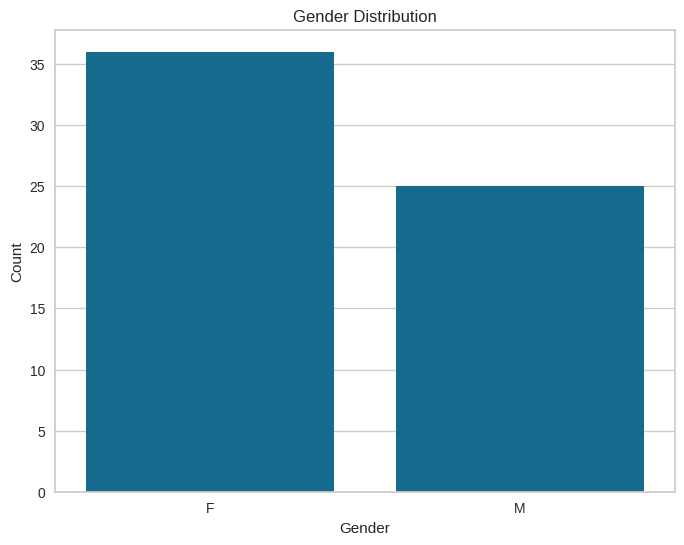

In [166]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your dataset is stored in a DataFrame named 'df'
# If not, replace 'df' with your DataFrame variable name

# Visualizing Gender distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


# You can continue visualizing other variables similarly


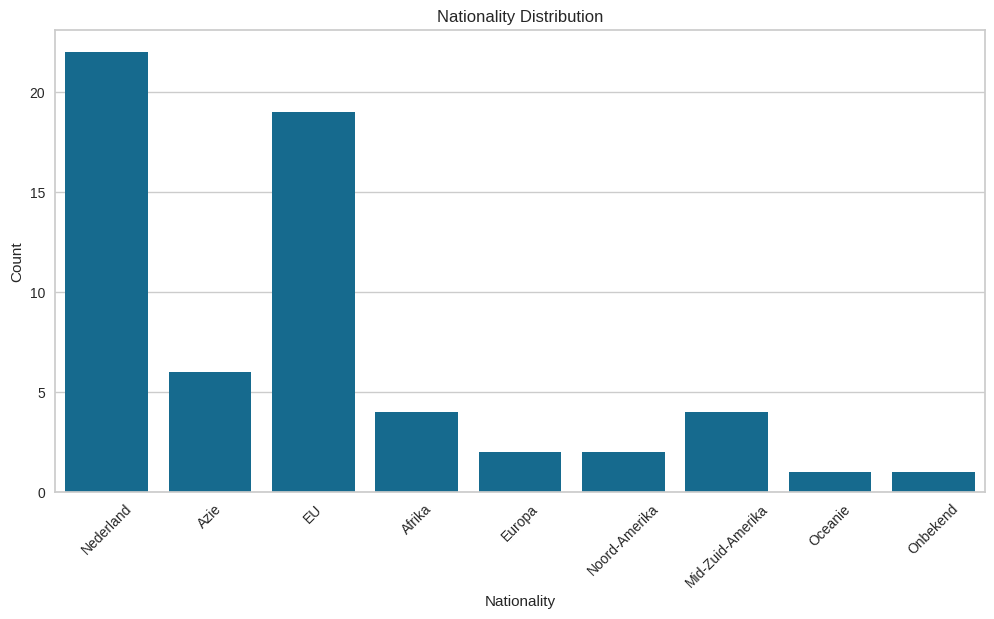

In [167]:
# Visualizing Nationality distribution
plt.figure(figsize=(12, 6))
sns.countplot(x='Nationality', data=df)
plt.title('Nationality Distribution')
plt.xlabel('Nationality')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

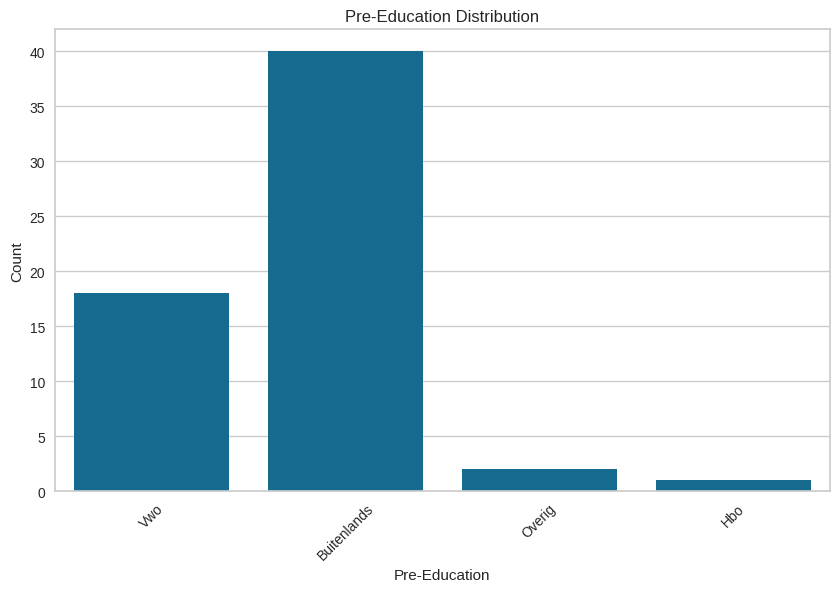

In [168]:
# Visualizing Pre-Education distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='PreEducation', data=df)
plt.title('Pre-Education Distribution')
plt.xlabel('Pre-Education')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

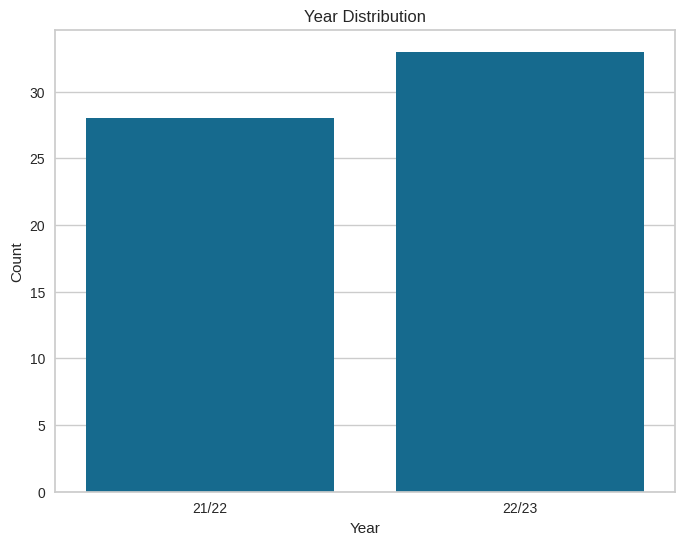

In [169]:
# Visualizing Year distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Year', data=df)
plt.title('Year Distribution')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

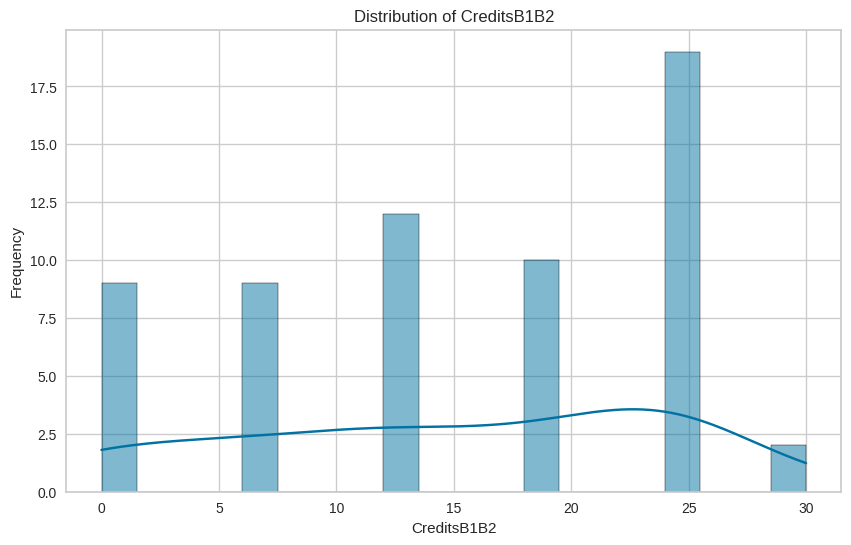

In [180]:
# Visualizing distribution of CreditsB1B2
plt.figure(figsize=(10, 6))
sns.histplot(df['Credits-B1B2'], bins=20, kde=True)
plt.title('Distribution of CreditsB1B2')
plt.xlabel('CreditsB1B2')
plt.ylabel('Frequency')
plt.show()




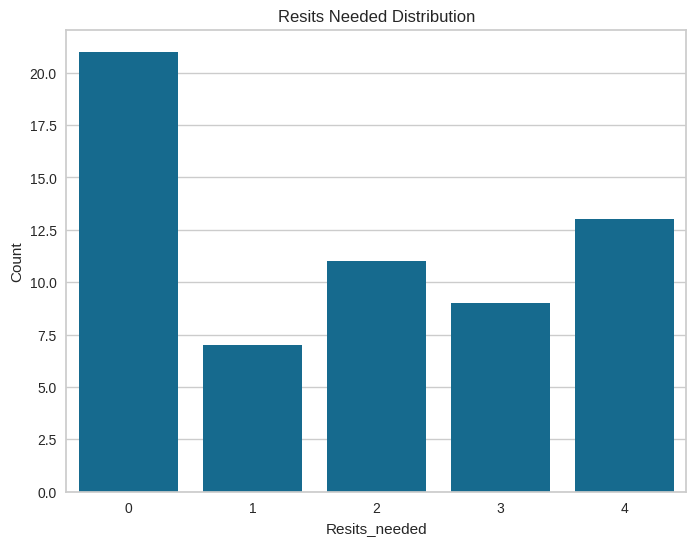

In [175]:
# Visualizing distribution of Resits_needed
plt.figure(figsize=(8, 6))
sns.countplot(x='resits_needed', data=df)
plt.title('Resits Needed Distribution')
plt.xlabel('Resits_needed')
plt.ylabel('Count')
plt.show()

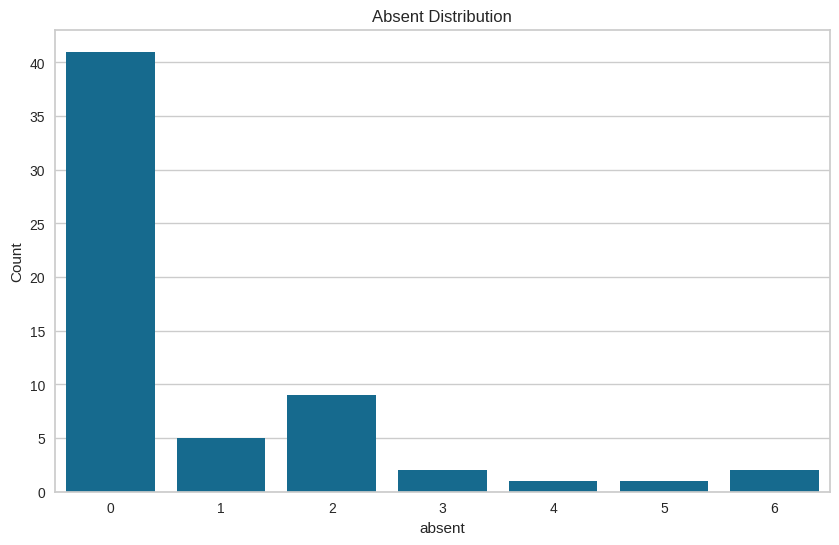

In [176]:
# Visualizing distribution of absent
plt.figure(figsize=(10, 6))
sns.countplot(x='absent', data=df)
plt.title('Absent Distribution')
plt.xlabel('absent')
plt.ylabel('Count')
plt.show()

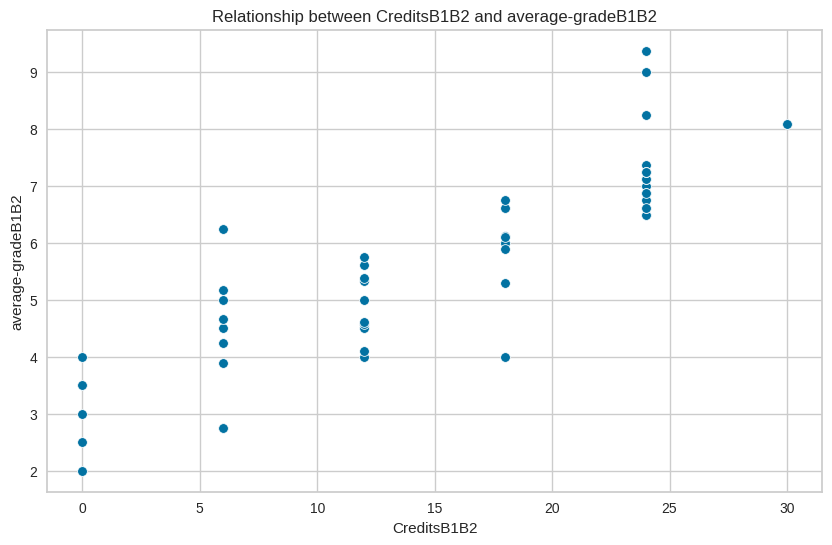

In [177]:
# Visualizing relationship between CreditsB1B2 and average-gradeB1B2
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Credits-B1B2', y='average_gradeB1B2', data=df)
plt.title('Relationship between CreditsB1B2 and average-gradeB1B2')
plt.xlabel('CreditsB1B2')
plt.ylabel('average-gradeB1B2')
plt.show()

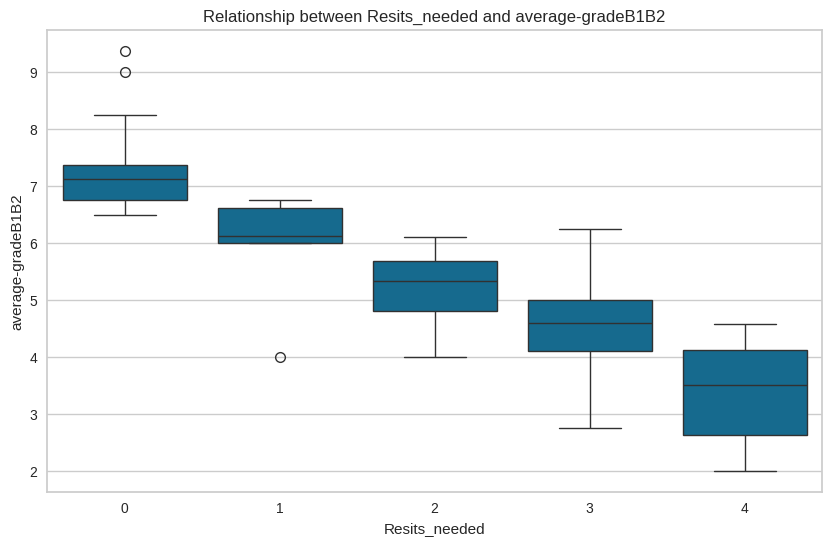

In [178]:
# Visualizing relationship between Resits_needed and average-gradeB1B2
plt.figure(figsize=(10, 6))
sns.boxplot(x='resits_needed', y='average_gradeB1B2', data=df)
plt.title('Relationship between Resits_needed and average-gradeB1B2')
plt.xlabel('Resits_needed')
plt.ylabel('average-gradeB1B2')
plt.show()

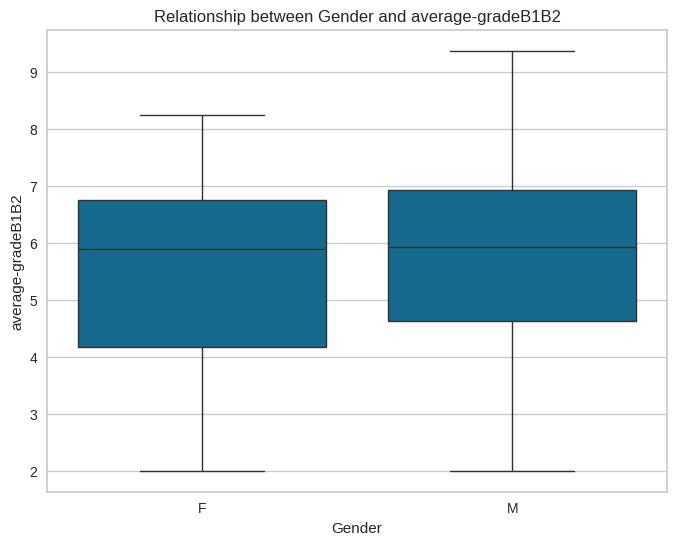

In [179]:
# Visualizing relationship between Gender and average-gradeB1B2
plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='average_gradeB1B2', data=df)
plt.title('Relationship between Gender and average-gradeB1B2')
plt.xlabel('Gender')
plt.ylabel('average-gradeB1B2')
plt.show()

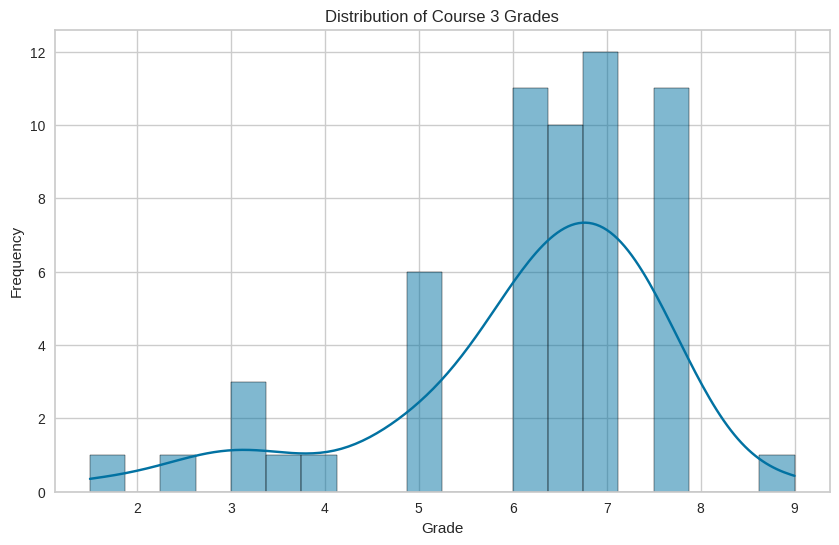

In [181]:
# Visualizing Course 3 grades
plt.figure(figsize=(10, 6))
sns.histplot(df['Course3-1'], bins=20, kde=True)
plt.title('Distribution of Course 3 Grades')
plt.xlabel('Grade')
plt.ylabel('Frequency')
plt.show()


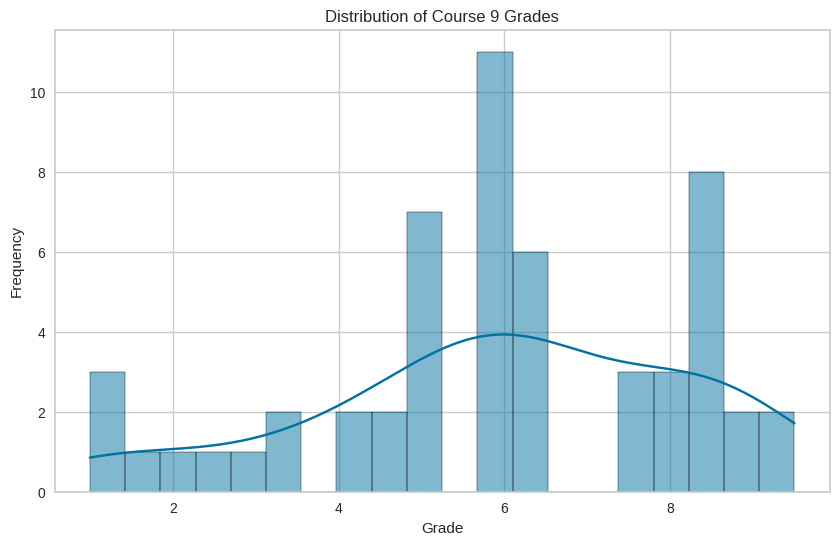

In [182]:
# Visualizing Course 9 grades
plt.figure(figsize=(10, 6))
sns.histplot(df['Course9-1'], bins=20, kde=True)
plt.title('Distribution of Course 9 Grades')
plt.xlabel('Grade')
plt.ylabel('Frequency')
plt.show()

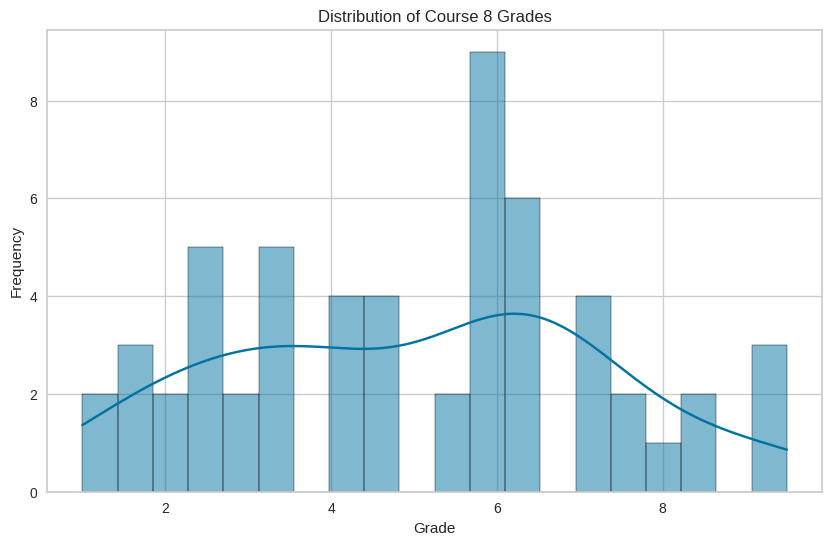

In [183]:
# Visualizing Course 8 grades
plt.figure(figsize=(10, 6))
sns.histplot(df['Course8-1'], bins=20, kde=True)
plt.title('Distribution of Course 8 Grades')
plt.xlabel('Grade')
plt.ylabel('Frequency')
plt.show()

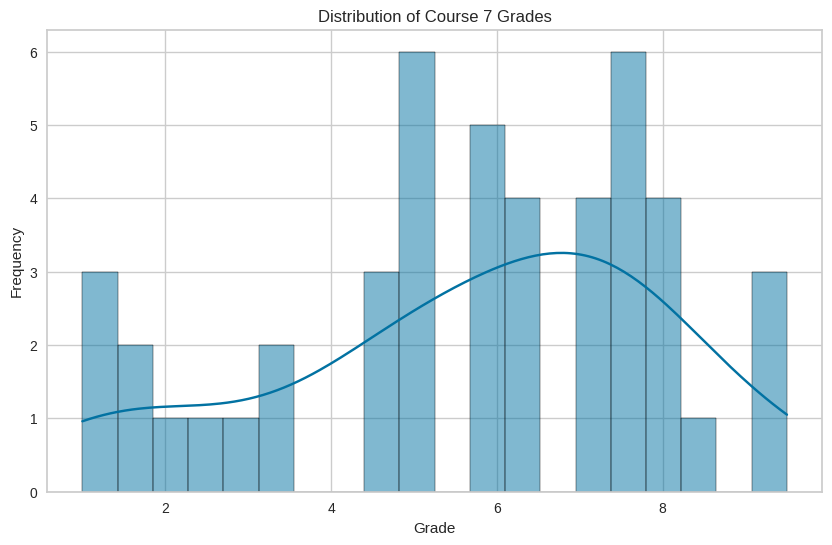

In [184]:
# Visualizing Course 7 grades
plt.figure(figsize=(10, 6))
sns.histplot(df['Course7-1'], bins=20, kde=True)
plt.title('Distribution of Course 7 Grades')
plt.xlabel('Grade')
plt.ylabel('Frequency')
plt.show()

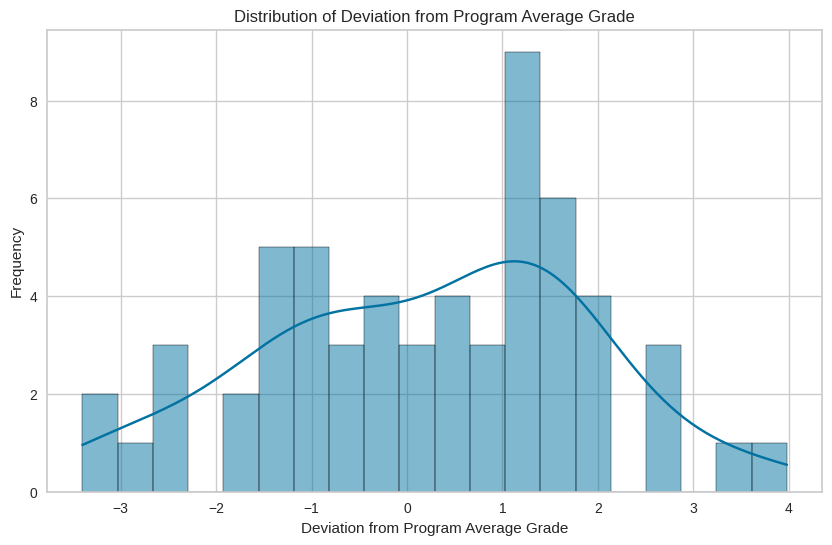

In [186]:
# Visualizing distribution of deviationB1B2 using a histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['deviationB1B2'], bins=20, kde=True)
plt.title('Distribution of Deviation from Program Average Grade')
plt.xlabel('Deviation from Program Average Grade')
plt.ylabel('Frequency')
plt.show()




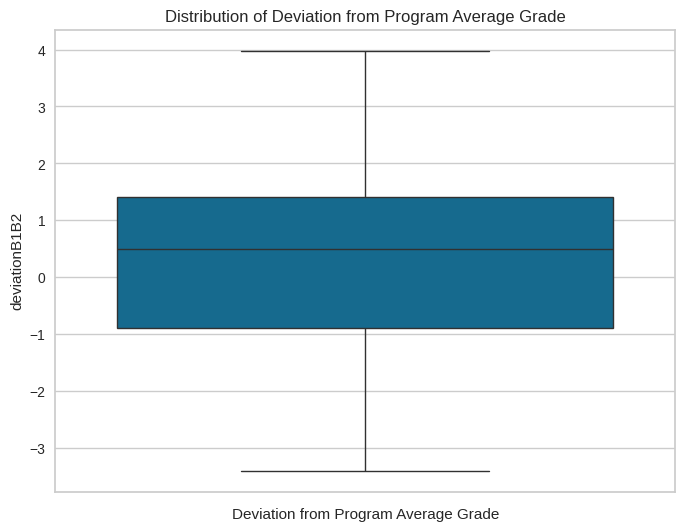

In [185]:
# Visualizing distribution of deviationB1B2 using a box plot
plt.figure(figsize=(8, 6))
sns.boxplot(df['deviationB1B2'])
plt.title('Distribution of Deviation from Program Average Grade')
plt.xlabel('Deviation from Program Average Grade')
plt.show()

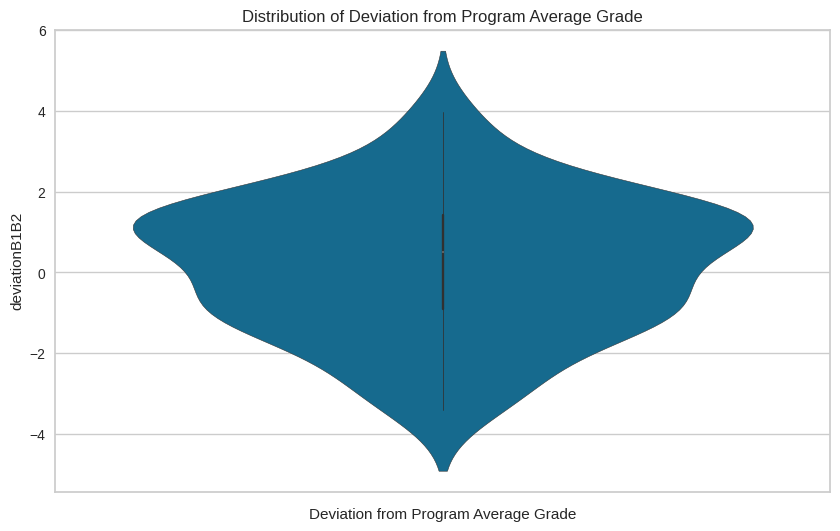

In [188]:
# Visualizing distribution of deviationB1B2 using a violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(df['deviationB1B2'])
plt.title('Distribution of Deviation from Program Average Grade')
plt.xlabel('Deviation from Program Average Grade')
plt.show()


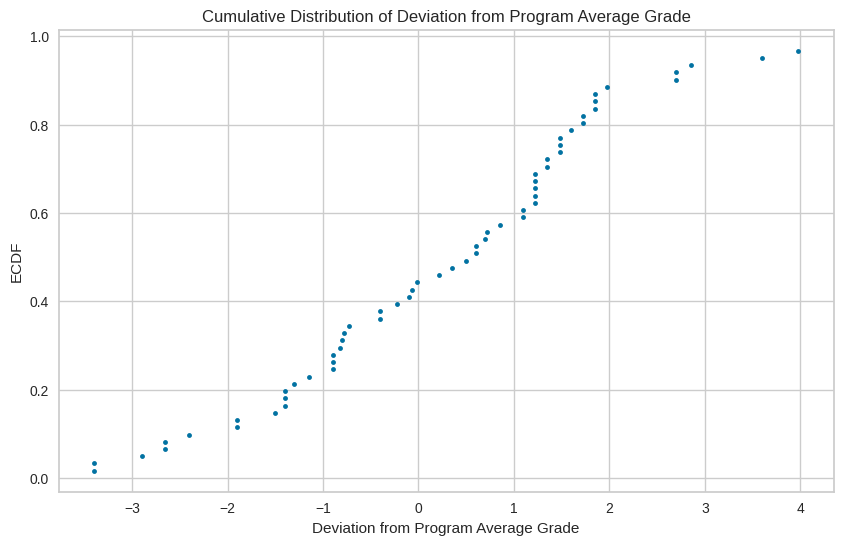

In [187]:
# Visualizing cumulative distribution of deviationB1B2 using ECDF plot
import numpy as np

def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n+1) / n
    return x, y

plt.figure(figsize=(10, 6))
x_deviation, y_deviation = ecdf(df['deviationB1B2'])
plt.plot(x_deviation, y_deviation, marker='.', linestyle='none')
plt.title('Cumulative Distribution of Deviation from Program Average Grade')
plt.xlabel('Deviation from Program Average Grade')
plt.ylabel('ECDF')
plt.grid(True)
plt.show()


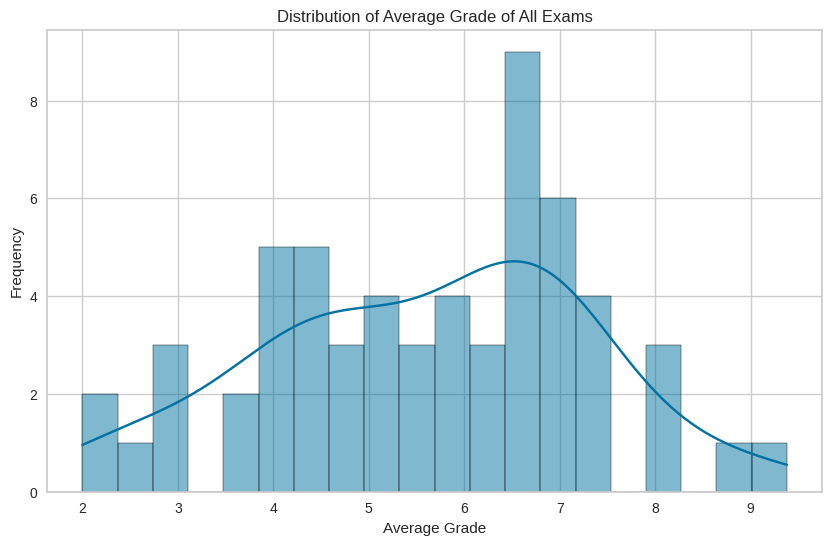

In [190]:
# Visualizing distribution of average-gradeB1B2 using a histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['average_gradeB1B2'], bins=20, kde=True)
plt.title('Distribution of Average Grade of All Exams')
plt.xlabel('Average Grade')
plt.ylabel('Frequency')
plt.show()




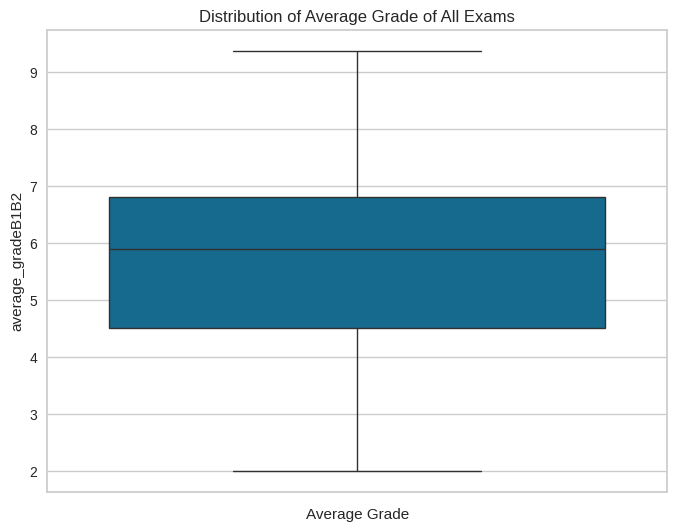

In [191]:
# Visualizing distribution of average-gradeB1B2 using a box plot
plt.figure(figsize=(8, 6))
sns.boxplot(df['average_gradeB1B2'])
plt.title('Distribution of Average Grade of All Exams')
plt.xlabel('Average Grade')
plt.show()

<ipython-input-192-96be9287e73d>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['average_gradeB1B2'], shade=True)


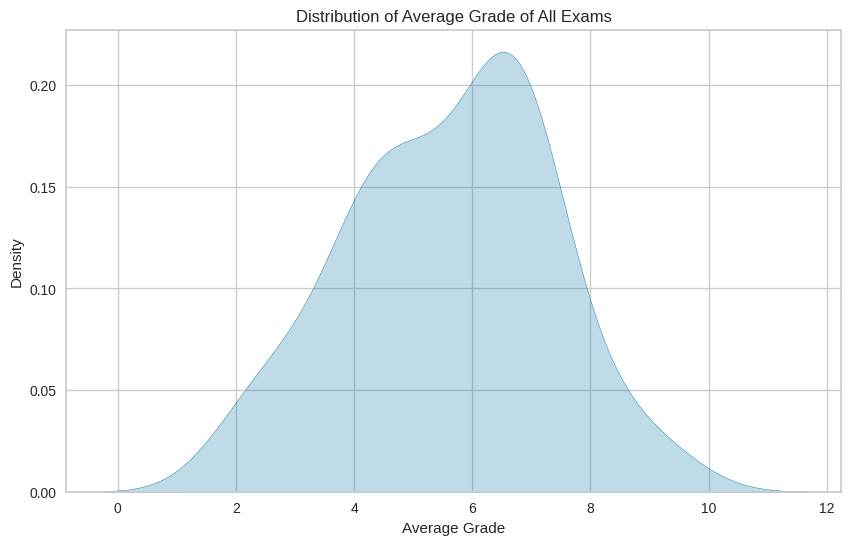

In [192]:
# Visualizing distribution of average-gradeB1B2 using a KDE plot
plt.figure(figsize=(10, 6))
sns.kdeplot(df['average_gradeB1B2'], shade=True)
plt.title('Distribution of Average Grade of All Exams')
plt.xlabel('Average Grade')
plt.ylabel('Density')
plt.show()

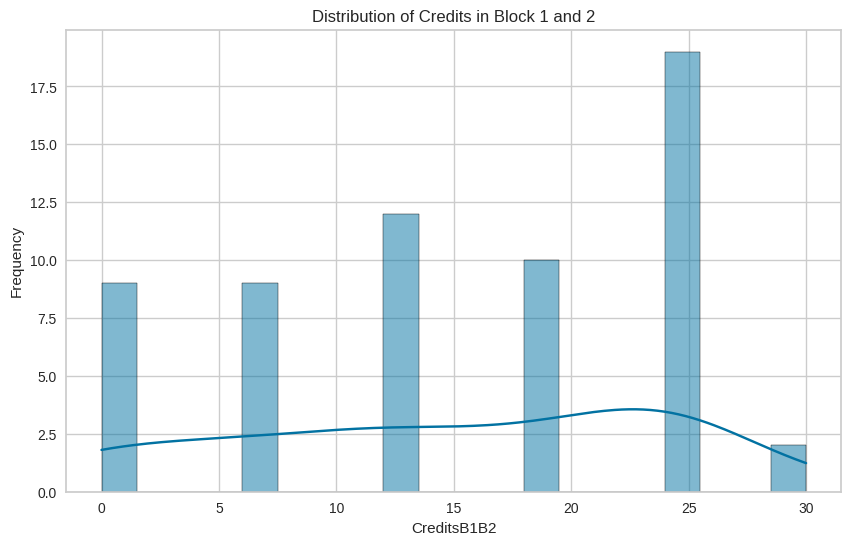

In [195]:
# Visualizing distribution of CreditsB1B2 using a histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['Credits-B1B2'], bins=20, kde=True)
plt.title('Distribution of Credits in Block 1 and 2')
plt.xlabel('CreditsB1B2')
plt.ylabel('Frequency')
plt.show()




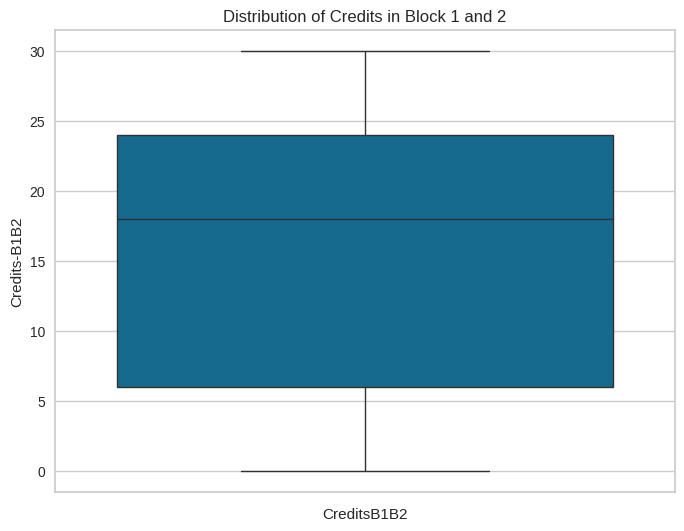

In [196]:

# Visualizing distribution of CreditsB1B2 using a box plot
plt.figure(figsize=(8, 6))
sns.boxplot(df['Credits-B1B2'])
plt.title('Distribution of Credits in Block 1 and 2')
plt.xlabel('CreditsB1B2')
plt.show()

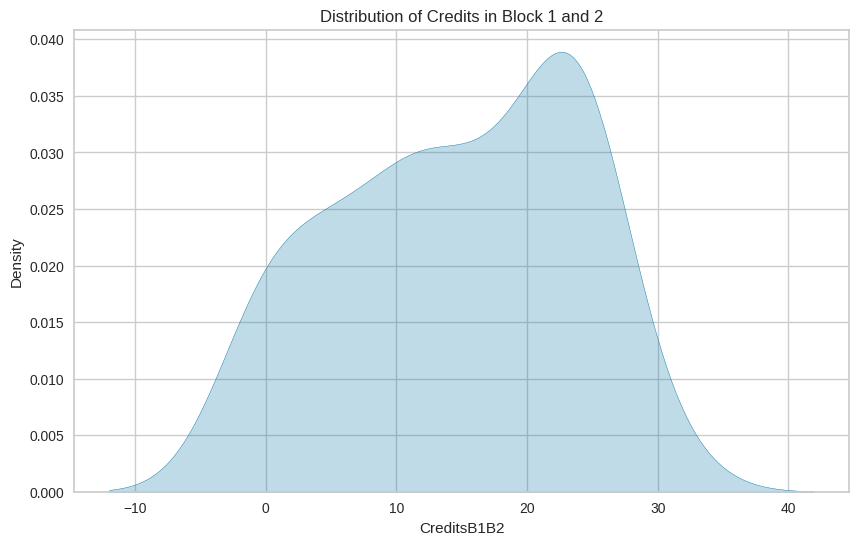

In [198]:
# Visualizing distribution of CreditsB1B2 using a KDE plot
plt.figure(figsize=(10, 6))
sns.kdeplot(df['Credits-B1B2'], fill=True)
plt.title('Distribution of Credits in Block 1 and 2')
plt.xlabel('CreditsB1B2')
plt.ylabel('Density')
plt.show()

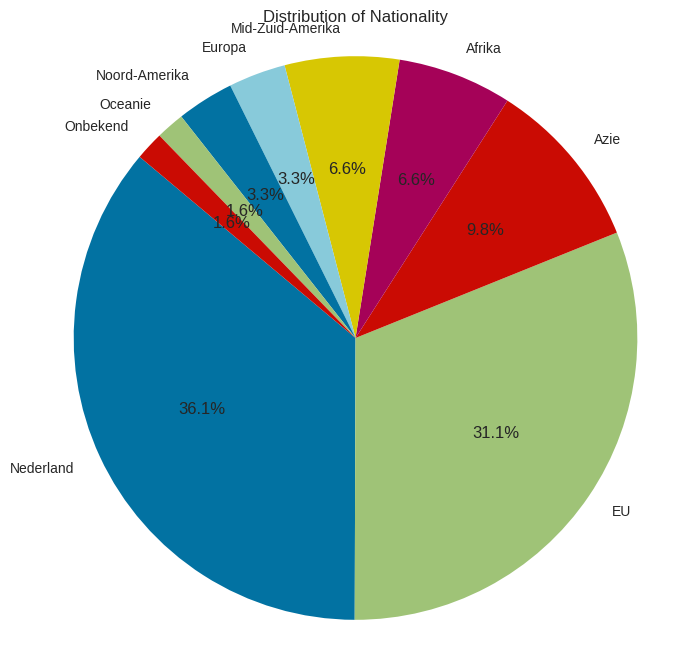

In [199]:
# Counting the frequency of each nationality
nationality_counts = df['Nationality'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(nationality_counts, labels=nationality_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Nationality')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()


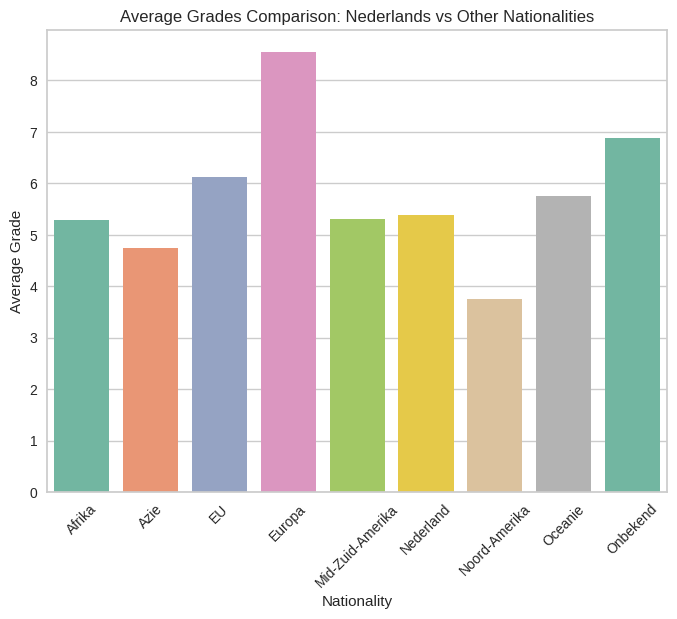

In [206]:
import seaborn as sns

# Plotting the comparison
plt.figure(figsize=(8, 6))
sns.barplot(x='Nationality', y='average_gradeB1B2', data=avg_grades_by_nationality, hue='Nationality', palette='Set2', dodge=False, legend=False)
plt.title('Average Grades Comparison: Nederlands vs Other Nationalities')
plt.xlabel('Nationality')
plt.ylabel('Average Grade')
plt.xticks(rotation=45)
plt.show()


<ipython-input-213-1f5562a06966>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Dutch', y='average_gradeB1B2', data=df, palette='Set2')


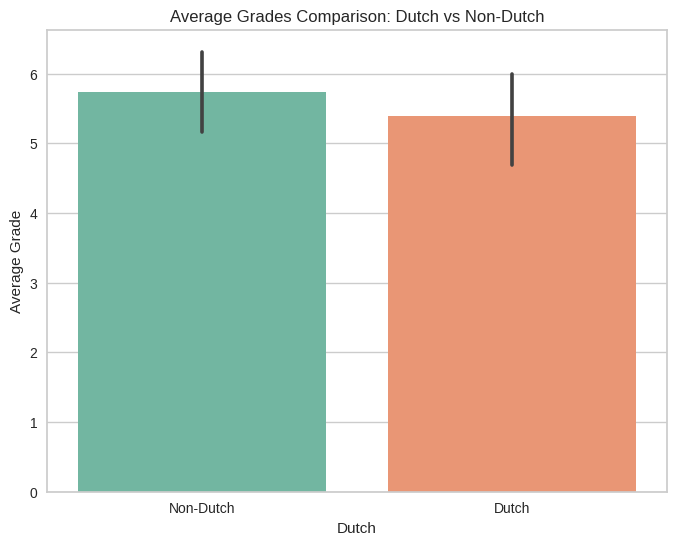

In [213]:
import seaborn as sns

# Plotting the comparison
plt.figure(figsize=(8, 6))
sns.barplot(x='Dutch', y='average_gradeB1B2', data=df, palette='Set2')
plt.title('Average Grades Comparison: Dutch vs Non-Dutch')
plt.xlabel('Dutch')
plt.ylabel('Average Grade')
plt.xticks([0, 1], ['Non-Dutch', 'Dutch'])  # Renaming x-axis ticks
plt.show()


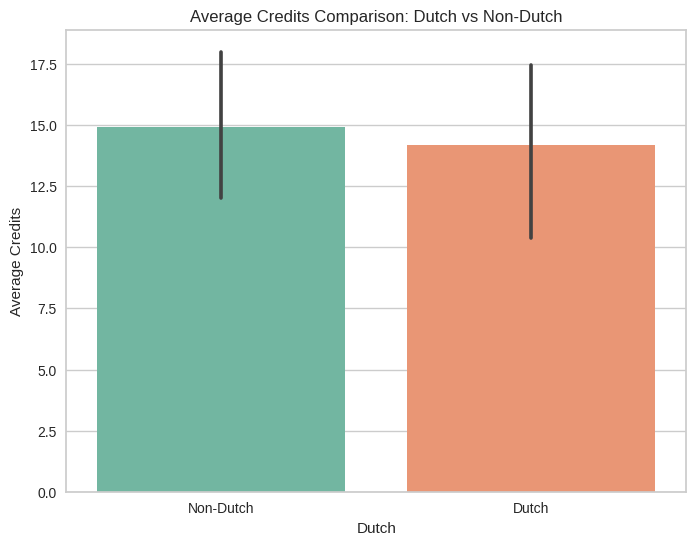

In [217]:
# Plotting the comparison of average credits for Dutch and non-Dutch students
plt.figure(figsize=(8, 6))
sns.barplot(x='Dutch', y='Credits-B1B2', hue='Dutch', data=df, palette='Set2', dodge=False, legend=False)
plt.title('Average Credits Comparison: Dutch vs Non-Dutch')
plt.xlabel('Dutch')
plt.ylabel('Average Credits')
plt.xticks([0, 1], ['Non-Dutch', 'Dutch'])  # Renaming x-axis ticks
plt.show()


<ipython-input-218-bfd5e4850c23>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='TotalPassedC', data=df, palette='Set2')


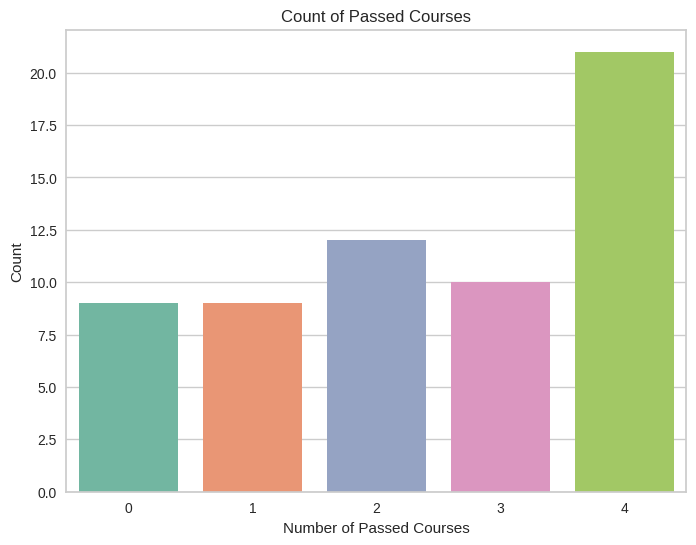

In [218]:
# Summing the passedC dummies to get the count of all passed courses
df['TotalPassedC'] = df[['passedC3', 'passedC7', 'passedC9', 'passedC8']].sum(axis=1)

# Plotting the count of all passed courses
plt.figure(figsize=(8, 6))
sns.countplot(x='TotalPassedC', data=df, palette='Set2')
plt.title('Count of Passed Courses')
plt.xlabel('Number of Passed Courses')
plt.ylabel('Count')
plt.show()


<ipython-input-221-ea4e5df4f413>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=passed_counts.index, y=passed_counts.values, palette='Set2')


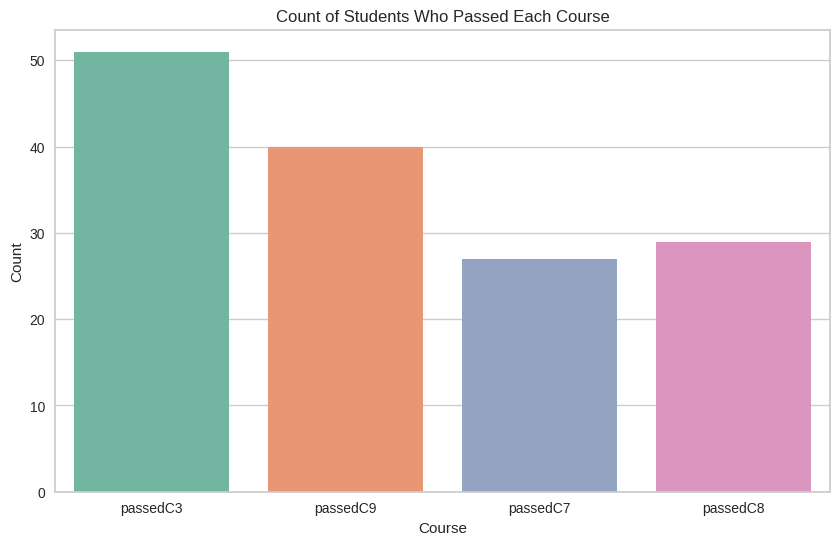

In [221]:
# Counting the number of students who passed each course
passed_counts = df[['passedC3', 'passedC9', 'passedC7', 'passedC8']].sum()

# Plotting the count of students who passed each course
plt.figure(figsize=(10, 6))
sns.barplot(x=passed_counts.index, y=passed_counts.values, palette='Set2')
plt.title('Count of Students Who Passed Each Course')
plt.xlabel('Course')
plt.ylabel('Count')
plt.show()
